REF:https://huailiang.github.io/blog/2019/sound/

In [ ]:
!pip install librosa
# !pip install mutagen

In [23]:
import librosa
audio_path1 = '10℃.mp3'            # bgm1
audio_path2 = '303PM_230312.wav'        # bgm2
# audio_path3 = 'サンタは中央線でやってくる.mp3' # bgm3
# audio_path4 = '野良猫は宇宙を目指した.mp3'   # bgm4
x1,sr1 = librosa.load(audio_path1)
x2,sr2 = librosa.load(audio_path2)
# x3,sr3 = librosa.load(audio_path3)
# x4,sr4 = librosa.load(audio_path4)
# print(type(x), type(sr))
print(x1.shape, sr1)
print(x2.shape, sr2)
# print(x3.shape, sr3)
# print(x4.shape, sr4)

(4797504,) 22050
(3087000,) 22050


In [ ]:
from mutagen.mp3 import MP3
audio1 = MP3(audio_path1)
audio2 = MP3(audio_path2)
print(audio1.info.length)
print(audio2.info.length)

217.3869
10078.8835


試聽

In [ ]:
import IPython.display as ipd
# ipd.Audio(audio_path1)
ipd.Audio(audio_path2)
# ipd.Audio(audio_path3)
# ipd.Audio(audio_path4)

## 波形圖

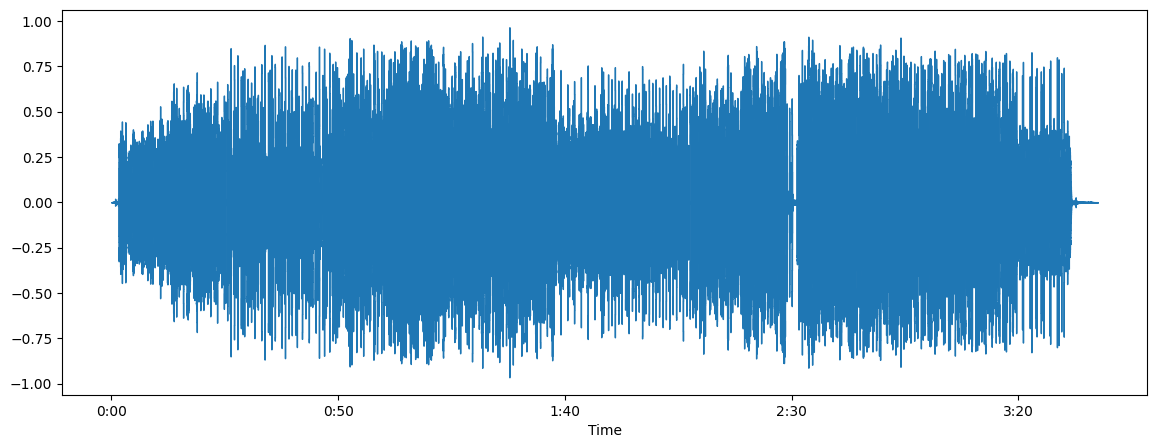

In [ ]:
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14,5))
librosa.display.waveshow(x1, sr=sr1) # 波形圖 橫軸:時間/縱軸:強度

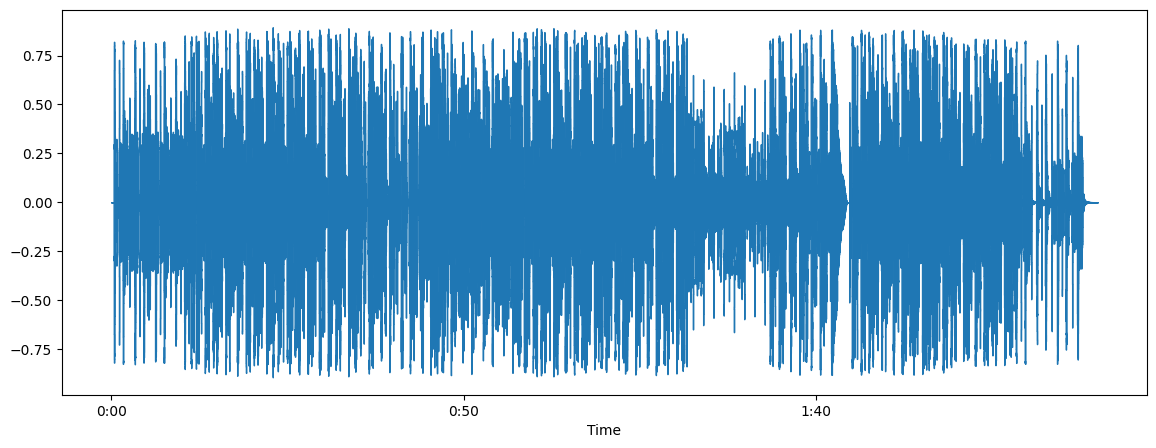

In [ ]:
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14,5))
librosa.display.waveshow(x2, sr=sr2)

In [ ]:
# import matplotlib.pyplot as plt
# import librosa.display
# plt.figure(figsize=(14,5))
# librosa.display.waveshow(x3, sr=sr3)

In [ ]:
# import matplotlib.pyplot as plt
# import librosa.display
# plt.figure(figsize=(14,5))
# librosa.display.waveshow(x4, sr=sr4)

## 聲譜圖(spectrogram)

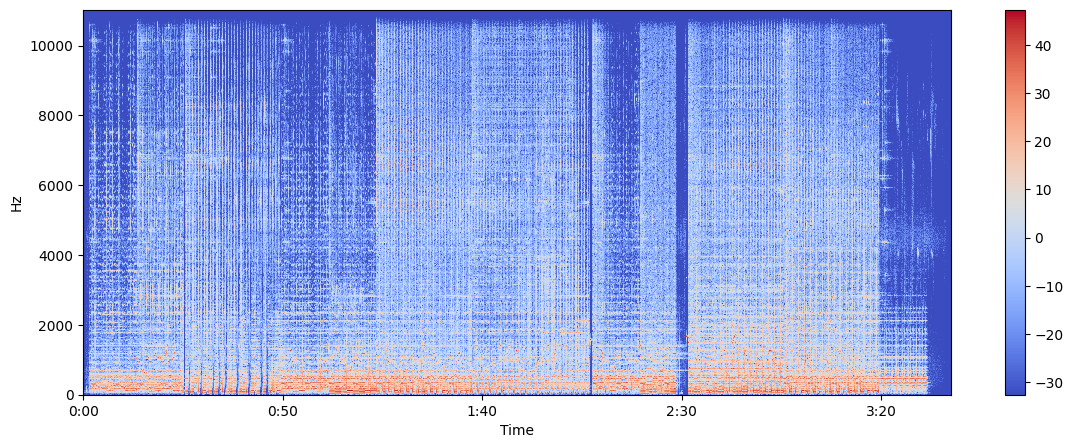

In [ ]:
X = librosa.stft(x1)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr1, x_axis='time', y_axis='hz')
plt.colorbar()

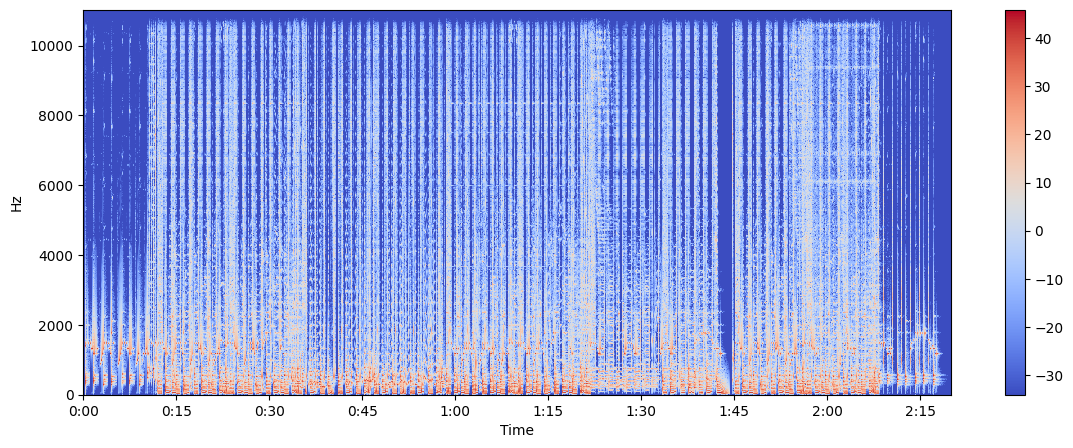

In [ ]:
X = librosa.stft(x2)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr2, x_axis='time', y_axis='hz')
plt.colorbar()

In [ ]:
# X = librosa.stft(x3)
# Xdb = librosa.amplitude_to_db(abs(X))
# plt.figure(figsize=(14, 5))
# librosa.display.specshow(Xdb, sr=sr3, x_axis='time', y_axis='hz')
# plt.colorbar()

In [ ]:
# X = librosa.stft(x4)
# Xdb = librosa.amplitude_to_db(abs(X))
# plt.figure(figsize=(14, 5))
# librosa.display.specshow(Xdb, sr=sr4, x_axis='time', y_axis='hz')
# plt.colorbar()

## feature

### 過零率 Zero Crossing Rate

In [3]:
zero_crossings1 = librosa.zero_crossings(x1, pad=False)
zero_crossings2 = librosa.zero_crossings(x2, pad=False)
# zero_crossings3 = librosa.zero_crossings(x3, pad=False)
# zero_crossings4 = librosa.zero_crossings(x4, pad=False)
print('zero_crossings')
print(sum(zero_crossings1))
print(sum(zero_crossings2))
print('zero_crossings per second')
print(sum(zero_crossings1)/217.4)
print(sum(zero_crossings2)/10078.9)
# print(sum(zero_crossings3))
# print(sum(zero_crossings4))

zero_crossings
404628
298085
zero_crossings per second
1861.2143514259428
29.575152050322952


In [18]:
frame,step = 512,320
zcr1,zcr2=[],[]

for i in range(0,len(zero_crossings1)-frame,step):
  a = zero_crossings1[i: i + 320]
  zcr1.append(a.sum())

for i in range(0,len(zero_crossings2)-frame,step):
  a = zero_crossings2[i: i + 320]
  zcr2.append(a.sum())

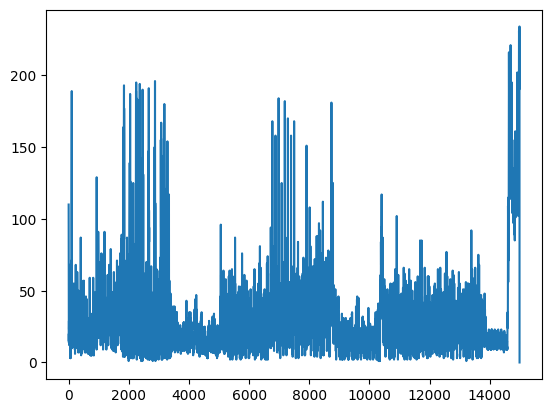

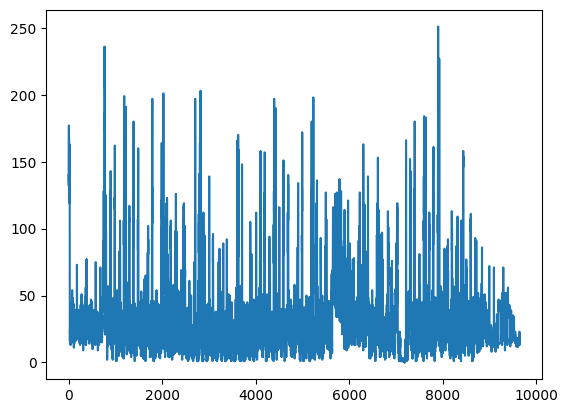

In [22]:
plt.plot(range(len(zcr1)), zcr1)
plt.show()

plt.plot(range(len(zcr2)), zcr2)
plt.show()

### 光譜質心 Spectral Centroid

In [26]:
import sklearn
from sklearn.preprocessing import minmax_scale

def normalize(x, axis=0):
  return sklearn.preprocessing.minmax_scale(x, axis=axis)

(9371,)


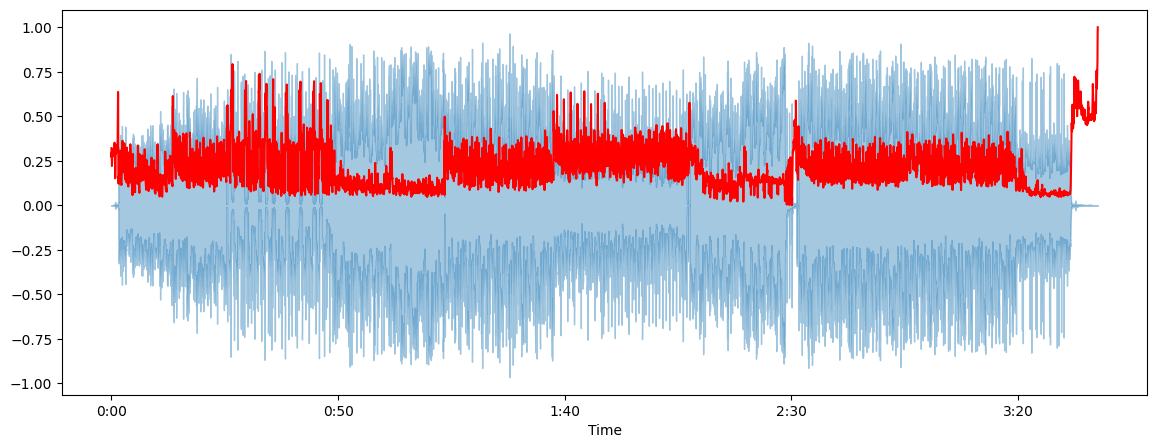

In [ ]:
spectral_centroids = librosa.feature.spectral_centroid(y=x1, sr=sr1)[0]
print(spectral_centroids.shape)

frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

plt.figure(figsize=(14,5))
librosa.display.waveshow(x1, sr=sr1, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

(6030,)


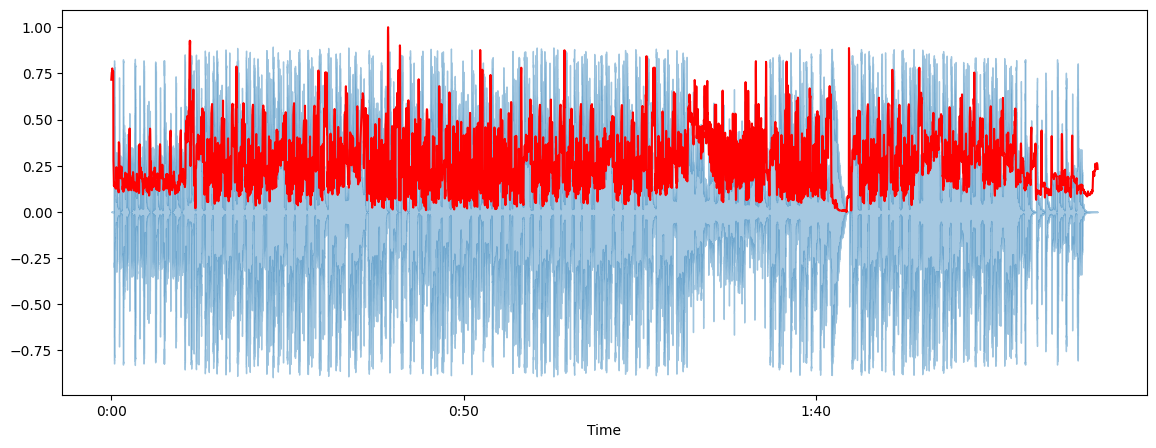

In [ ]:
spectral_centroids = librosa.feature.spectral_centroid(y=x2, sr=sr2)[0]
print(spectral_centroids.shape)

frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

plt.figure(figsize=(14,5))
librosa.display.waveshow(x2, sr=sr2, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

In [ ]:
# spectral_centroids = librosa.feature.spectral_centroid(y=x3, sr=sr3)[0]
# print(spectral_centroids.shape)

# frames = range(len(spectral_centroids))
# t = librosa.frames_to_time(frames)

# plt.figure(figsize=(14,5))
# librosa.display.waveshow(x3, sr=sr3, alpha=0.4)
# plt.plot(t, normalize(spectral_centroids), color='r')

In [ ]:
# spectral_centroids = librosa.feature.spectral_centroid(y=x4, sr=sr4)[0]
# print(spectral_centroids.shape)

# frames = range(len(spectral_centroids))
# t = librosa.frames_to_time(frames)

# plt.figure(figsize=(14,5))
# librosa.display.waveshow(x4, sr=sr4, alpha=0.4)
# plt.plot(t, normalize(spectral_centroids), color='r')

### 聲譜衰減 Spectral Roll-off

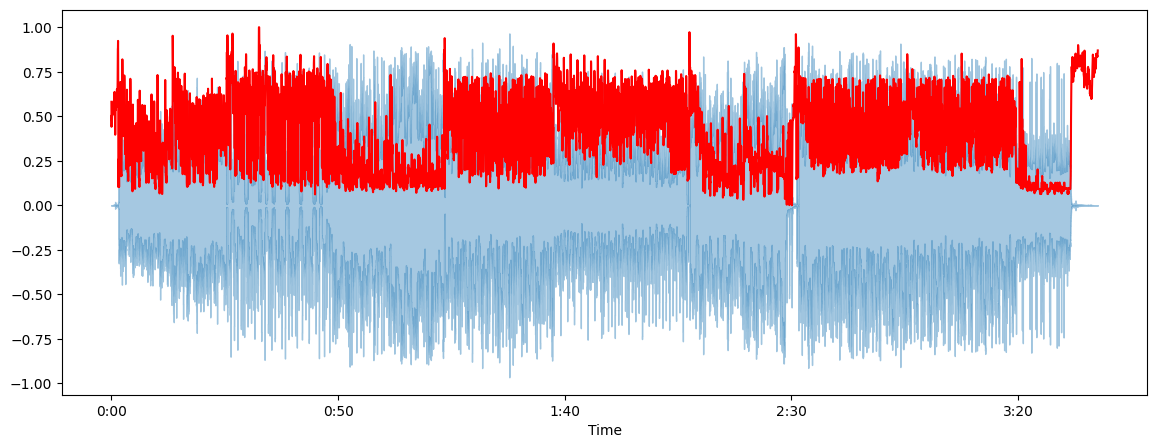

In [ ]:
spectral_rolloff = librosa.feature.spectral_rolloff(y=x1, sr=sr1)[0]
frames = range(len(spectral_rolloff))
t = librosa.frames_to_time(frames)
plt.figure(figsize=(14,5))
librosa.display.waveshow(x1, sr=sr1, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

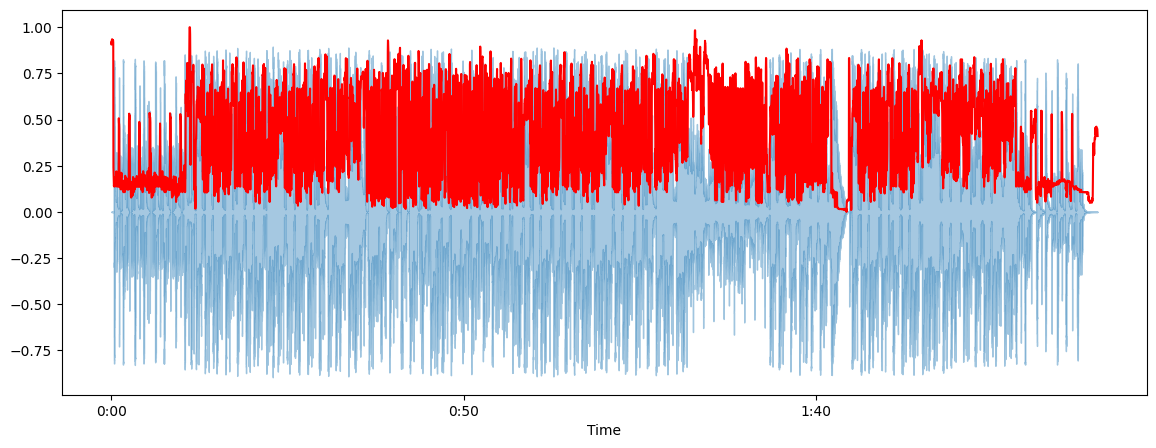

In [ ]:
spectral_rolloff = librosa.feature.spectral_rolloff(y=x2, sr=sr2)[0]
frames = range(len(spectral_rolloff))
t = librosa.frames_to_time(frames)
plt.figure(figsize=(14,5))
librosa.display.waveshow(x2, sr=sr2, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

In [ ]:
# spectral_rolloff = librosa.feature.spectral_rolloff(y=x3, sr=sr3)[0]
# frames = range(len(spectral_rolloff))
# t = librosa.frames_to_time(frames)
# plt.figure(figsize=(14,5))
# librosa.display.waveshow(x3, sr=sr3, alpha=0.4)
# plt.plot(t, normalize(spectral_rolloff), color='r')

In [ ]:
# spectral_rolloff = librosa.feature.spectral_rolloff(y=x4, sr=sr4)[0]
# frames = range(len(spectral_rolloff))
# t = librosa.frames_to_time(frames)
# plt.figure(figsize=(14,5))
# librosa.display.waveshow(x4, sr=sr4, alpha=0.4)
# plt.plot(t, normalize(spectral_rolloff), color='r')

### 梅爾頻率倒譜係數 MFCC

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:259: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


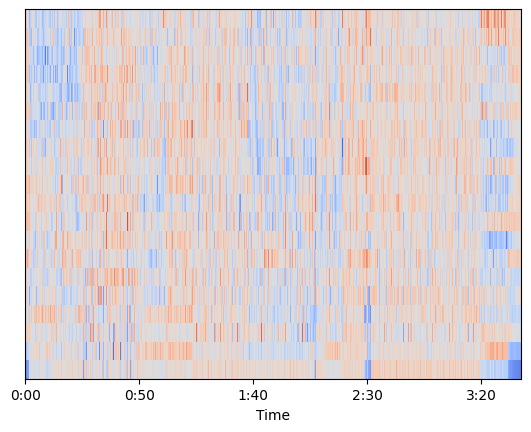

In [32]:
mfccs = librosa.feature.mfcc(y=x1, sr=sr1)
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
librosa.display.specshow(mfccs, sr=sr1, x_axis='time')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:259: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


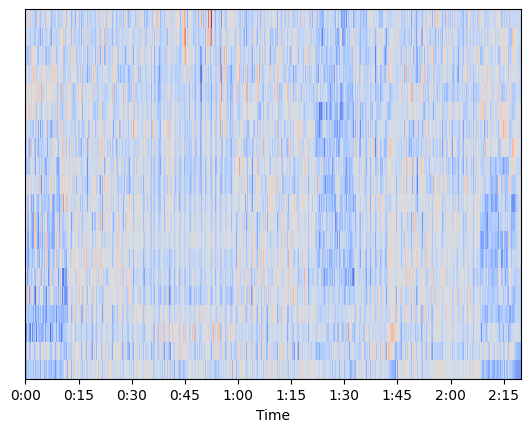

In [30]:
mfccs = librosa.feature.mfcc(y=x2, sr=sr2)
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
librosa.display.specshow(mfccs, sr=sr2, x_axis='time')

In [ ]:
# mfccs = librosa.feature.mfcc(y=x3, sr=sr3)
# mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
# librosa.display.specshow(mfccs, sr=sr3, x_axis='time')

In [ ]:
# mfccs = librosa.feature.mfcc(y=x4, sr=sr4)
# mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
# librosa.display.specshow(mfccs, sr=sr4, x_axis='time')

### 色度頻率 Chroma Frequencies

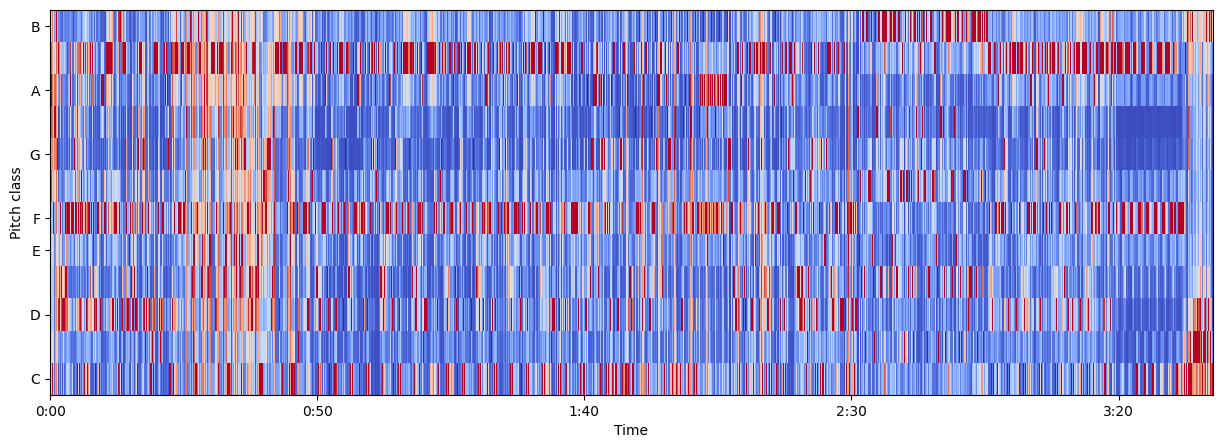

In [ ]:
hop_length = 512
chromagram = librosa.feature.chroma_stft(y=x1, sr=sr1, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

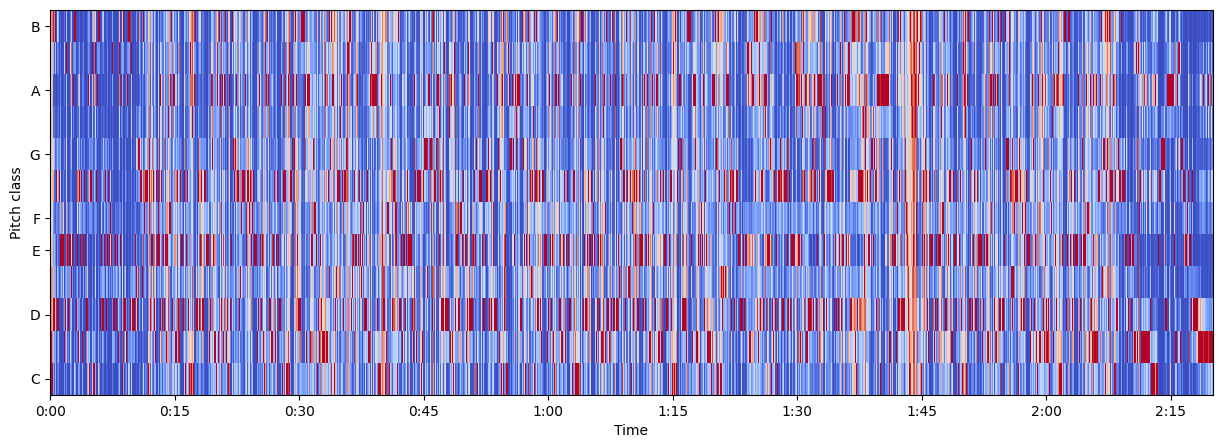

In [ ]:
hop_length = 512
chromagram = librosa.feature.chroma_stft(y=x2, sr=sr2, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

In [ ]:
# hop_length = 512
# chromagram = librosa.feature.chroma_stft(y=x3, sr=sr3, hop_length=hop_length)
# plt.figure(figsize=(15, 5))
# librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

In [ ]:
# hop_length = 512
# chromagram = librosa.feature.chroma_stft(y=x4, sr=sr4, hop_length=hop_length)
# plt.figure(figsize=(15, 5))
# librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')